# PREDECIR EL PUNTAJE CREDITICIO

# PIPELINE ALGORITMOS DE CLASIFICACIÓN

# 1. PIPELINE/RECOLECCIÓN DE DATOS
1.1 Importar y Leer el DataSet

In [26]:
# Librerias para manipulacion de Data y Gráficas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score


In [27]:
#Leer el DataSet
data = pd.read_csv('/content/train.csv')

<ipython-input-27-5bcbb99aa570>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/train.csv')


# 2. PIPELINE/ANÁLISIS EXPLORATORIO DE DATOS (EDA)


# Comprendiendo los Datos

In [28]:
data.drop(['ID', 'Name', 'Type_of_Loan','SSN', 'Customer_ID', 'Month', 'Credit_History_Age'], axis=1, inplace=True)

In [29]:
# Realizamos cambios en los nombres de las columnas para una mejor manipulación y accesibilidad
data.rename(columns={'Age':'Edad'}, inplace=True)
data.rename(columns={'Occupation':'Ocupacion'}, inplace=True)
data.rename(columns={'Annual_Income':'Ingresos_Anuales'}, inplace=True)
data.rename(columns={'Monthly_Inhand_Salary':'Salario_Mensual_Disponible'}, inplace=True)
data.rename(columns={'Num_Bank_Accounts':'Numero_de_Cuentas_Bancaria'}, inplace=True)
data.rename(columns={'Num_Credit_Card':'Numero_de_Tarjetas_de_Credito'}, inplace=True)
data.rename(columns={'Interest_Rate':'Tasa_de_Interes'}, inplace=True)
data.rename(columns={'Num_of_Loan':'Numero_de_Prestamos'}, inplace=True)
data.rename(columns={'Delay_from_due_date':'Retraso_desde_Fecha_de_Vencimiento'}, inplace=True)
data.rename(columns={'Num_of_Delayed_Payment':'Numero_de_Pagos_Retrasados'}, inplace=True)
data.rename(columns={'Changed_Credit_Limit':'Limite_de_Creditos_Modificados'}, inplace=True)
data.rename(columns={'Num_Credit_Inquiries':'Numero_de_Consultas_de_Credito'}, inplace=True)
data.rename(columns={'Credit_Mix':'Creditos_Combinados'}, inplace=True)
data.rename(columns={'Outstanding_Debt':'Deudas_Pendientes'}, inplace=True)
data.rename(columns={'Credit_Utilization_Ratio':'Indice_de_Utilizacion_del_Credito'}, inplace=True)
data.rename(columns={'Payment_of_Min_Amount':'Cantidad_del_Pago_Minimo'}, inplace=True)
data.rename(columns={'Total_EMI_per_month':'Cuota_Total_Mensual'}, inplace=True)
data.rename(columns={'Amount_invested_monthly':'Monto_Invertido_Mensualmente'}, inplace=True)
data.rename(columns={'Payment_Behaviour':'Comportamiento_del_Pago'}, inplace=True)
data.rename(columns={'Monthly_Balance':'Saldo_Mensual'}, inplace=True)
data.rename(columns={'Credit_Score':'Puntaje_Crediticio'}, inplace=True)


data.info() # Verificamos los cambios nuevamente con info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Edad                                100000 non-null  object 
 1   Ocupacion                           100000 non-null  object 
 2   Ingresos_Anuales                    100000 non-null  object 
 3   Salario_Mensual_Disponible          84998 non-null   float64
 4   Numero_de_Cuentas_Bancaria          100000 non-null  int64  
 5   Numero_de_Tarjetas_de_Credito       100000 non-null  int64  
 6   Tasa_de_Interes                     100000 non-null  int64  
 7   Numero_de_Prestamos                 100000 non-null  object 
 8   Retraso_desde_Fecha_de_Vencimiento  100000 non-null  int64  
 9   Numero_de_Pagos_Retrasados          92998 non-null   object 
 10  Limite_de_Creditos_Modificados      100000 non-null  object 
 11  Numero_de_Consultas_de_Cred

In [30]:
# nulos de la feature Salario_Mensual_Disponible
data['Salario_Mensual_Disponible']=data['Salario_Mensual_Disponible'].fillna(data['Salario_Mensual_Disponible'].mean())

# nulos de la feature Numero_de_Consultas_de_Credito
data['Numero_de_Consultas_de_Credito']=data['Numero_de_Consultas_de_Credito'].fillna(data['Numero_de_Consultas_de_Credito'].mean())

# nulos de la feature Monto_Invertido_Mensualmente
data["Monto_Invertido_Mensualmente"] = data["Monto_Invertido_Mensualmente"].str.replace("_","")
data['Monto_Invertido_Mensualmente'] = data["Monto_Invertido_Mensualmente"].astype(float)
data['Monto_Invertido_Mensualmente']=data['Monto_Invertido_Mensualmente'].fillna(data['Monto_Invertido_Mensualmente'].mean())

# nulos de la feature Saldo_Mensual
data["Saldo_Mensual"] = data["Saldo_Mensual"].str.replace("_","")
data['Saldo_Mensual'] = data["Saldo_Mensual"].astype(float)
data['Saldo_Mensual']=data['Saldo_Mensual'].fillna(data['Saldo_Mensual'].mean())

# nulos de la feature Numero_de_Pagos_Retrasados
data["Numero_de_Pagos_Retrasados"] = data["Numero_de_Pagos_Retrasados"].str.replace("NAN","")
data["Numero_de_Pagos_Retrasados"] = data["Numero_de_Pagos_Retrasados"].str.replace("_","")
data['Numero_de_Pagos_Retrasados'] = data["Numero_de_Pagos_Retrasados"].astype(float)
data['Numero_de_Pagos_Retrasados']=data['Numero_de_Pagos_Retrasados'].fillna(data['Numero_de_Pagos_Retrasados'].mean())

#Transformacion de los datos nulos feature Edad like negatives or 28_ or another to number
data["Edad"] = data["Edad"].str.replace("_+NA","")
data["Edad"] = data["Edad"].str.replace("_","")
data['Edad'] = data["Edad"].astype(int)
# transform to NaN negatives values
data.loc[data['Edad'] < 0, 'Edad'] = pd.NA
data['Edad']=data['Edad'].fillna(data['Edad'].mean())

data["Numero_de_Prestamos"] = data["Numero_de_Prestamos"].str.replace("_+NA","")
data["Numero_de_Prestamos"] = data["Numero_de_Prestamos"].str.replace("_","")
data['Numero_de_Prestamos'] = data["Numero_de_Prestamos"].astype(int)
# transform to NaN negatives values
data.loc[data['Numero_de_Prestamos'] < 0, 'Numero_de_Prestamos'] = pd.NA
data['Numero_de_Prestamos']=data['Numero_de_Prestamos'].fillna(data['Numero_de_Prestamos'].mean())


data["Deudas_Pendientes"] = data["Deudas_Pendientes"].str.replace("_","")
data['Deudas_Pendientes'] = data["Deudas_Pendientes"].astype(float)
# transform to NaN negatives values
data.loc[data['Deudas_Pendientes'] < 0, 'Deudas_Pendientes'] = pd.NA

# nulos de la feature Ingresos_Anuales
data["Ingresos_Anuales"] = data["Ingresos_Anuales"].str.replace("_","")
data['Ingresos_Anuales'] = data["Ingresos_Anuales"].astype(float)

data["Comportamiento_del_Pago"]  = data["Comportamiento_del_Pago"].str.replace("!@9#%8","_______","1")

In [31]:
data.drop(['Ocupacion', 'Retraso_desde_Fecha_de_Vencimiento', 'Limite_de_Creditos_Modificados','Comportamiento_del_Pago','Creditos_Combinados','Cantidad_del_Pago_Minimo'], axis=1, inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Edad                               100000 non-null  float64
 1   Ingresos_Anuales                   100000 non-null  float64
 2   Salario_Mensual_Disponible         100000 non-null  float64
 3   Numero_de_Cuentas_Bancaria         100000 non-null  int64  
 4   Numero_de_Tarjetas_de_Credito      100000 non-null  int64  
 5   Tasa_de_Interes                    100000 non-null  int64  
 6   Numero_de_Prestamos                100000 non-null  float64
 7   Numero_de_Pagos_Retrasados         100000 non-null  float64
 8   Numero_de_Consultas_de_Credito     100000 non-null  float64
 9   Deudas_Pendientes                  100000 non-null  float64
 10  Indice_de_Utilizacion_del_Credito  100000 non-null  float64
 11  Cuota_Total_Mensual                10000

In [33]:
#Identificar si tenemos datos nulos
data.isnull().sum()

,0
Edad,0
Ingresos_Anuales,0
Salario_Mensual_Disponible,0
Numero_de_Cuentas_Bancaria,0
Numero_de_Tarjetas_de_Credito,0
Tasa_de_Interes,0
Numero_de_Prestamos,0
Numero_de_Pagos_Retrasados,0
Numero_de_Consultas_de_Credito,0
Deudas_Pendientes,0


In [34]:
#data['Edad'] = data['Edad'].astype(int)
#data['Numero_de_Prestamos'] = data['Numero_de_Prestamos'].astype(int)
data['Deudas_Pendientes'] = data['Deudas_Pendientes'].astype(int)
#data['Cantidad_del_Pago_Minimo'] = data['Cantidad_del_Pago_Minimo'].astype(int)
#data['Cantidad_del_Pago_Minimo'] = data['Cantidad_del_Pago_Minimo'].astype(float)


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Edad                               100000 non-null  float64
 1   Ingresos_Anuales                   100000 non-null  float64
 2   Salario_Mensual_Disponible         100000 non-null  float64
 3   Numero_de_Cuentas_Bancaria         100000 non-null  int64  
 4   Numero_de_Tarjetas_de_Credito      100000 non-null  int64  
 5   Tasa_de_Interes                    100000 non-null  int64  
 6   Numero_de_Prestamos                100000 non-null  float64
 7   Numero_de_Pagos_Retrasados         100000 non-null  float64
 8   Numero_de_Consultas_de_Credito     100000 non-null  float64
 9   Deudas_Pendientes                  100000 non-null  int64  
 10  Indice_de_Utilizacion_del_Credito  100000 non-null  float64
 11  Cuota_Total_Mensual                10000

In [36]:
# Mostrar las primeras filas del Dataframe para ir reconociendo la dataframe
data.head()

,Edad,Ingresos_Anuales,Salario_Mensual_Disponible,Numero_de_Cuentas_Bancaria,Numero_de_Tarjetas_de_Credito,Tasa_de_Interes,Numero_de_Prestamos,Numero_de_Pagos_Retrasados,Numero_de_Consultas_de_Credito,Deudas_Pendientes,Indice_de_Utilizacion_del_Credito,Cuota_Total_Mensual,Monto_Invertido_Mensualmente,Saldo_Mensual,Puntaje_Crediticio
0,23.000000,19114.12,1824.843333,3,4,3,4.0,7.000000,4.0,809,26.822620,49.574949,80.415295,312.494089,Good
1,23.000000,19114.12,4194.170850,3,4,3,4.0,30.923342,4.0,809,31.944960,49.574949,118.280222,284.629162,Good
2,116.108421,19114.12,4194.170850,3,4,3,4.0,7.000000,4.0,809,28.609352,49.574949,81.699521,331.209863,Good
3,23.000000,19114.12,4194.170850,3,4,3,4.0,4.000000,4.0,809,31.377862,49.574949,199.458074,223.451310,Good
4,23.000000,19114.12,1824.843333,3,4,3,4.0,30.923342,4.0,809,24.797347,49.574949,41.420153,341.489231,Good


:# Aplicar Encoding a las características categóricas

In [37]:
#Con el fin de analizar la correlación entre las caracteristicas se realiza encode de la columna objetivo rain
label_encoders = {}
columns_to_encode = ['Puntaje_Crediticio']

for column in columns_to_encode:
    le = LabelEncoder()
    data[column + '_encoded'] = le.fit_transform(data[column])
    label_encoders[column] = le
data.head()

,Edad,Ingresos_Anuales,Salario_Mensual_Disponible,Numero_de_Cuentas_Bancaria,Numero_de_Tarjetas_de_Credito,Tasa_de_Interes,Numero_de_Prestamos,Numero_de_Pagos_Retrasados,Numero_de_Consultas_de_Credito,Deudas_Pendientes,Indice_de_Utilizacion_del_Credito,Cuota_Total_Mensual,Monto_Invertido_Mensualmente,Saldo_Mensual,Puntaje_Crediticio,Puntaje_Crediticio_encoded
0,23.000000,19114.12,1824.843333,3,4,3,4.0,7.000000,4.0,809,26.822620,49.574949,80.415295,312.494089,Good,0
1,23.000000,19114.12,4194.170850,3,4,3,4.0,30.923342,4.0,809,31.944960,49.574949,118.280222,284.629162,Good,0
2,116.108421,19114.12,4194.170850,3,4,3,4.0,7.000000,4.0,809,28.609352,49.574949,81.699521,331.209863,Good,0
3,23.000000,19114.12,4194.170850,3,4,3,4.0,4.000000,4.0,809,31.377862,49.574949,199.458074,223.451310,Good,0
4,23.000000,19114.12,1824.843333,3,4,3,4.0,30.923342,4.0,809,24.797347,49.574949,41.420153,341.489231,Good,0


In [38]:
data['Puntaje_Crediticio'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [39]:
data['Puntaje_Crediticio_numerico'] = data['Puntaje_Crediticio'].replace({'Good': 0, 'Standard': 1, 'Poor': 2})

<ipython-input-39-d3e34d79980f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Puntaje_Crediticio_numerico'] = data['Puntaje_Crediticio'].replace({'Good': 0, 'Standard': 1, 'Poor': 2})


# Creamos la Matriz de Correlación

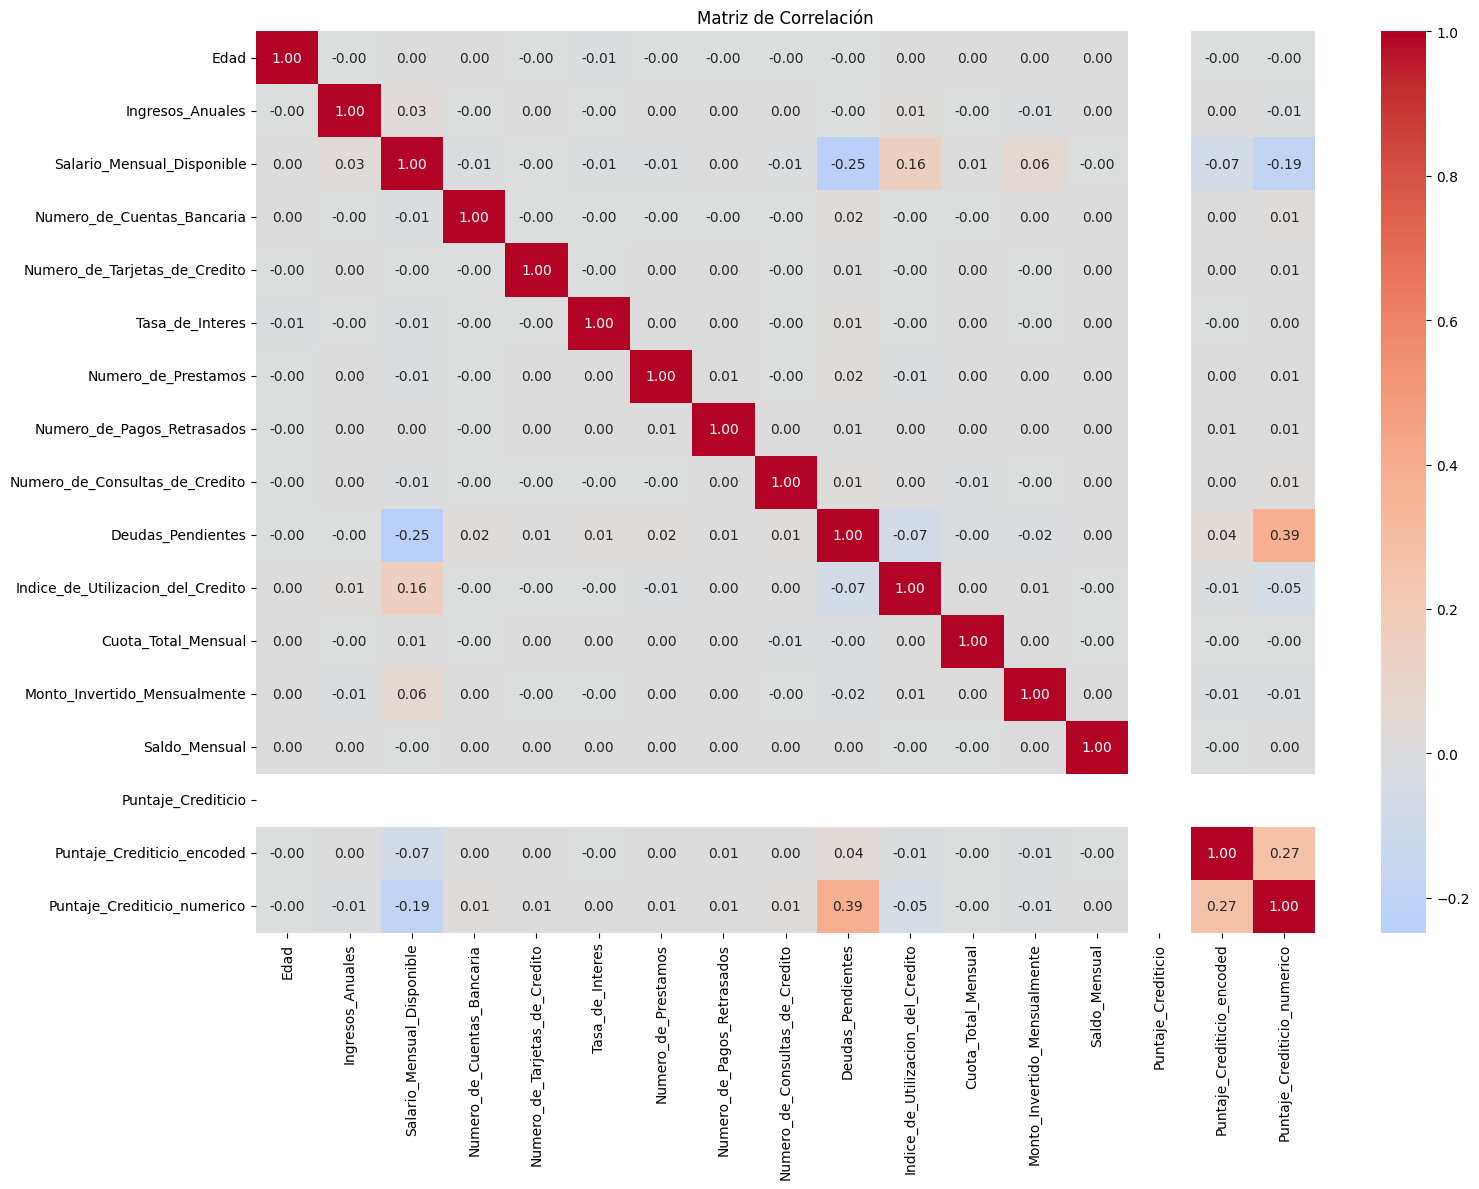

In [40]:
# Analizar la correlación de las caracteristicas con respecto a la columna objetivo.
for col in data.columns:
    # Convert to numeric, forcing errors to NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Now calculate the correlation matrix
plt.figure(figsize=(16, 12))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# Data Visualización

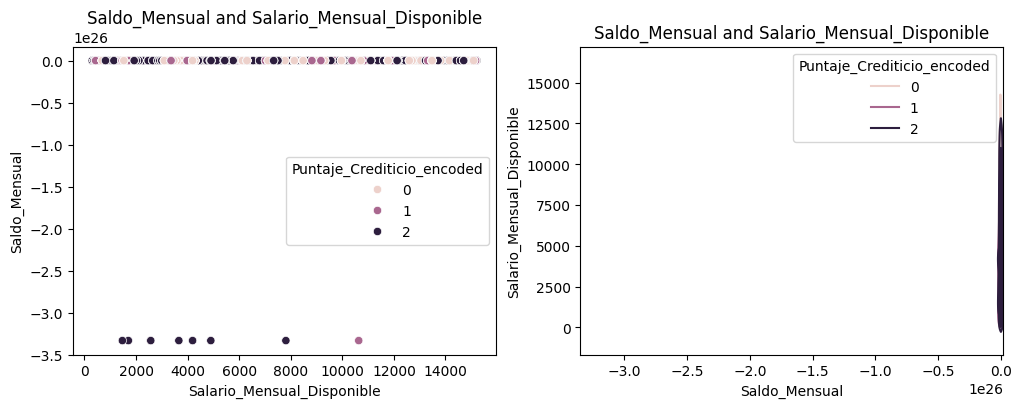

In [41]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Saldo_Mensual and Salario_Mensual_Disponible')
sns.scatterplot(x=data['Salario_Mensual_Disponible'],y=data['Saldo_Mensual'],hue=data['Puntaje_Crediticio_encoded']);

plt.subplot(1,2,2)
plt.title('Saldo_Mensual and Salario_Mensual_Disponible')
sns.kdeplot(x=data['Saldo_Mensual'],y=data['Salario_Mensual_Disponible'],hue=data['Puntaje_Crediticio_encoded']);

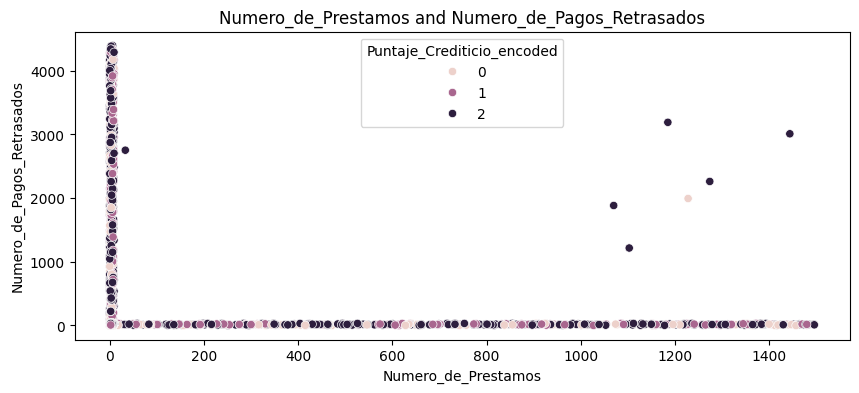

In [42]:
plt.figure(figsize=(10,4))
plt.title('Numero_de_Prestamos and Numero_de_Pagos_Retrasados')
sns.scatterplot(x=data['Numero_de_Prestamos'],y=data['Numero_de_Pagos_Retrasados'],hue=data['Puntaje_Crediticio_encoded']);

# 3. PIPELINE/DIVISÓN DE DATOS

**MUY IMPORTANTE: AL CORRER CADA EXPERIMENTO POR CADA ALGORITMO DISTINTO SE RECOMIENDA LEER EL DATASET, EJECUTAR TAREAS DE PROCESAMIENTO E INICIAR DESDE EL PASO 3, DE ESTA MANERA SI SE ESTÁ TRABAJANDO EN EL MISMO NOTEBOOK NO HAY POSIBLES INTERFERENCIA ENTRE LOS DATOS**



---



**EXPERIMENTO 1**




In [43]:
#Selección de la caracteristica o función objetivo y el resto de los datos
X = data.drop(['Puntaje_Crediticio','Puntaje_Crediticio_encoded'],axis=1)
y = data['Puntaje_Crediticio_encoded']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
#1750 instancias train
#750 instancias test

# 4. PIPELINE/SELECCIÓN Y CONSTRUCCIÓN DEL MÓDELO

In [44]:
'''Acá se está creando un modelo de regresión logística utilizando LogisticRegression de la biblioteca scikit-learn.
max_iter=1000: Estableces el número máximo de iteraciones para que el modelo pueda converger (es decir, encontrar los mejores coeficientes para los datos). Esto es útil si tienes un conjunto de datos complejo o grandes cantidades de datos.'''
model = LogisticRegression(max_iter=500)


# 5. PIPELINE/ENTRENAR EL MÓDELO

In [45]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

# 6. PIPELINE/EVALUACIÓN DEL MÓDELO

In [46]:
'''Utilizar el modelo entrenado (model) para predecir las etiquetas (Rain_encoded) para el conjunto de datos de prueba (X_test).
Genera un array (y_predict) que contiene las predicciones del modelo (0 o 1), basado en las características presentes en X_test.'''
y_predict = model.predict(X_test)

**Entendamos las Predicciones:**

In [47]:
# Crear tabla comparativa
comparison_table = pd.DataFrame({
    'Valor Real (y_test)': y_test,
    'Predicción (y_predict)': y_predict
})

# Mostrar las primeras filas de la tabla comparativa
print("\nTabla comparativa:")
print(comparison_table)


Tabla comparativa:
       Valor Real (y_test)  Predicción (y_predict)
35353                    1                       0
79057                    2                       0
65548                    2                       0
42701                    0                       0
6238                     1                       0
...                    ...                     ...
90642                    1                       0
52475                    2                       0
61269                    2                       0
14579                    1                       0
8917                     2                       0

[30000 rows x 2 columns]


In [48]:
# Descargar la tabla comparativa con el objetivo de poder observarla con mayor detalle
comparison_table.to_csv('comparacion_predicciones.csv', index=False, encoding='utf-8-sig')

**Crear función para Automatizar la forma en que podemos enviarle una instancia individual y que nos devuelva la predicción.**

In [49]:
def predecir_Puntaje_Crediticio(model,Edad, Ingresos_Anuales,Salario_Mensual_Disponible,Numero_de_Cuentas_Bancaria,Numero_de_Tarjetas_de_Credito,
Tasa_Interes,Numero_de_Prestamos,Numero_de_Pagos_Retrasados,Numero_de_Consultas_de_Credito,Deudas_Pendientes,
Indice_de_Utilizacion_del_Credito,Cuota_Total_Mensual,Monto_Invertido_Mensualmente,Saldo_Mensual):
    """
    Predice si llueve (1) o no (0) basado en los parámetros meteorológicos.

    Args:
        model: Modelo entrenado (ej: LogisticRegression)
        temperature: Temperatura en °C
        humidity: Humedad en %
        wind_speed: Velocidad del viento en km/h
        cloud_cover: Nubosidad en %
        pressure: Presión atmosférica en hPa

    Returns:
        int: 0 (No llueve) o 1 (Llueve)
    """
    # Crear array 2D con los valores en el orden correcto
    instancia = [[Edad, Ingresos_Anuales,Salario_Mensual_Disponible,Numero_de_Cuentas_Bancaria,Numero_de_Tarjetas_de_Credito,
Tasa_Interes,Numero_de_Prestamos,Numero_de_Pagos_Retrasados,Numero_de_Consultas_de_Credito,Deudas_Pendientes,
Indice_de_Utilizacion_del_Credito,Cuota_Total_Mensual,Monto_Invertido_Mensualmente,Saldo_Mensual]]
    return model.predict(instancia)[0]  # [0] para extraer el valor único

In [50]:
prediccion = predecir_Puntaje_Crediticio(
    model=model,
    Edad=23.000000,
Ingresos_Anuales=19114.12,
Salario_Mensual_Disponible=1824.843333,
Numero_de_Cuentas_Bancaria=3,
Numero_de_Tarjetas_de_Credito=4,
Tasa_Interes=3,
Numero_de_Prestamos=4.0,
Numero_de_Pagos_Retrasados=30.923342,
Numero_de_Consultas_de_Credito=4.0,
Deudas_Pendientes=809,
Indice_de_Utilizacion_del_Credito=24.797347,
Cuota_Total_Mensual=49.57494941.420153,
Monto_Invertido_Mensualmente=41.420153,
Saldo_Mensual=341.489231

)
print(f"Predicción 1: {'Good (0)' if prediccion == 0 else 'Poor (2)'}")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-50-838f9666feed>, line 14)

**Entendiendo mejor el resultado**

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Logistic Regression is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['LogisticRegression'])
accuracy_Logmodel = pd.DataFrame({'accuracy':serie})

In [ ]:
# Suponiendo que y_test contiene las etiquetas reales y y_predict las predicciones del modelo
confus_matrix = confusion_matrix(y_test, y_predict)

# Extraer valores de la matriz de confusión
Good, Standard, Poor = confus_matrix.ravel()

# Calcular métricas derivadas
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
specificity = TN / (TN + FP)  # Especificidad
f1 = f1_score(y_test, y_predict)

# Imprimir resultados
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision (PPV): {precision:.4f}")
print(f"🔹 Recall (Sensibilidad, TPR): {recall:.4f}")
print(f"🔹 Specificity (TNR): {specificity:.4f}")
print(f"🔹 F1-Score: {f1:.4f}")

# KNeighbors Application - Aplicación de Clasificador de vecinos mas cercanos

**EXPERIMENTO 2**

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of KNeighborsClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['KNeighborsClassifier'])
accuracy_KNmodel = pd.DataFrame({'accuracy':serie})

# Decision tree Application - Aplicación de Arboles de decisión

**EXPERIMENTO 3 - POR CADA EXPERIMENTO NUEVO REPETIR LOS PASOS QUE 3,4,5,6**

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

# Random Forest Application - Aplicación de Bosques Aleatorios

**EXPERIMENTO 4 - POR CADA EXPERIMENTO NUEVO REPETIR LOS PASOS QUE 3,4,5,6**

In [ ]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of RandomForestClassifier is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['RandomForestClassifier'])
accuracy_RFmodel = pd.DataFrame({'accuracy':serie})

# Gaussian Naive Bayes Application - Aplicación de Gaussian Naive Bayes

**EXPERIMENTO 5 - POR CADA EXPERIMENTO NUEVO REPETIR LOS PASOS QUE 3,4,5,6**

In [ ]:
model = GaussianNB()
model.fit(X_train,y_train)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of GaussianNB is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['GaussianNB'])
accuracy_NBmodel = pd.DataFrame({'accuracy':serie})

# Comparación del rendimiento de cada uno de los algoritmos utilizados

In [ ]:
accuracy_models = pd.concat([accuracy_Logmodel,accuracy_KNmodel,accuracy_DTmodel,accuracy_RFmodel,accuracy_NBmodel])
accuracy_models